In [8]:
import matplotlib.pyplot as plt
import numpy as np
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)

# Thomas Calculus
## Chapter 2 Limits and Continuity
### 2.1 Rates of Change and Tangent Lines to Curves
#### Average Rates of Change
#### Slope of a Curve at a Point
#### Instantaneous Rates of Change
### 2.2 Limit of a Function and Limit Laws
#### Limits from Graphs
#### Existence of Limits 
#### Calculating Limits
#### Using Limit Rules
#### Limits of Average Rates of Change
#### Using the Sandwich Theorem
#### Estimating Limits
You will find a graphing calculator useful for Exercises 67–74.

67. Let $f(x) = \dfrac{x^2 - 9}{x + 3}$.   
    a. Make a table of the values of $f$ at the points $x = -3.1,-3.01, -3.001$, and so on as far as your calculator can go.
    Then estimate $\lim\limits_{x\to -3}f(x)$. What estimate do you arrive at if
    you evaluate $f$ at $x = -2.9, -2.99, -2.999,\cdots$ instead?  
    b. Support your conclusions in part (a) by graphing $f$ near $c = -3$ and using Zoom and Trace to estimate $y$-values on the graph as $x \to -3$.  
    c. Find $\lim\limits_{x\to -3}f(x)$ algebraically, as in Example 7.

x      y
-2.9   -5.9000
-2.99   -5.9900
-2.999   -5.9990
-3.1   -6.1000
-3.01   -6.0100
-3.001   -6.0010


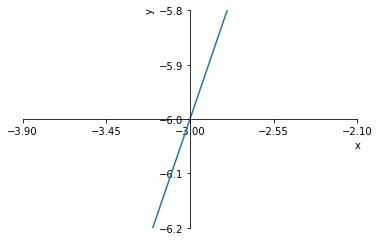

In [9]:
def f(x):
    return (x ** 2 - 9)/(x + 3)
x = [-2.9,-2.99,-2.999,-3.1,-3.01,-3.001]
print('x      y')
for i in x:
    print('{}   {:.4f}'.format(i,f(i)))
FunctionPlotter(f,3,CustomDomain=np.linspace(-3.9,-2.1,20),ticks=[np.linspace(-3.9,-2.1,5),np.linspace(-6.2,-5.8,5)],lim=[(-3.9,-2.1),(-6.2,-5.8)]).plot()

#### Theory and Examples
#### COMPUTER EXPLORATIONS
#### Graphical Estimates of Limits
In Exercises 83–88, use a CAS to perform the following steps:  
a. Plot the function near the point $c$ being approached.  
b. From your plot guess the value of the limit.   

83. $\lim\limits_{x\to 0}\dfrac{x^4 - 16}{x - 2}$

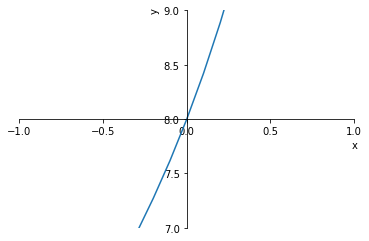

In [16]:
def f(x):
    return (x ** 4 - 16)/(x - 2)
FunctionPlotter(f,3,CustomDomain=np.linspace(-1,1,21),ticks=[np.linspace(-1,1,5),np.linspace(7,9,5)],lim=[(-1,1),(7,9)]).plot()